In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

data = pd.read_csv("Team_Project_doc_data_19/train_test_2019.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,18,Private,39302,12th,8,Never-married,Other-service,Own-child,White,Female,0,0,12,United-States,no
1,63,Local-gov,241404,Some-college,10,Divorced,Protective-serv,Not-in-family,White,Female,0,0,35,United-States,no
2,38,Self-emp-inc,312232,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,55,United-States,yes
3,52,Local-gov,230095,Some-college,10,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,no
4,27,Private,212895,Some-college,10,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,no


In [2]:
list(data.columns)

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'y']

In [3]:
X = data[data.columns[:-1]]
y = data.y

In [4]:
cats = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
X[cats] = pd.Categorical(X[cats])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [5]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,18,workclass,39302,education,8,marital-status,occupation,relationship,race,sex,0,0,12,native-country
1,63,workclass,241404,education,10,marital-status,occupation,relationship,race,sex,0,0,35,native-country
2,38,workclass,312232,education,13,marital-status,occupation,relationship,race,sex,0,0,55,native-country
3,52,workclass,230095,education,10,marital-status,occupation,relationship,race,sex,0,0,40,native-country
4,27,workclass,212895,education,10,marital-status,occupation,relationship,race,sex,0,0,40,native-country


In [6]:
dummies = pd.get_dummies(X[cats])
temp = pd.concat([X,dummies],axis=1)
X = temp.drop(cats,axis=1)

In [20]:
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_workclass,education_education,marital-status_marital-status,occupation_occupation,relationship_relationship,race_race,sex_sex,native-country_native-country
0,18,39302,8,0,0,12,1,1,1,1,1,1,1,1
1,63,241404,10,0,0,35,1,1,1,1,1,1,1,1
2,38,312232,13,0,0,55,1,1,1,1,1,1,1,1
3,52,230095,10,0,0,40,1,1,1,1,1,1,1,1
4,27,212895,10,0,0,40,1,1,1,1,1,1,1,1


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [25]:
clf = DecisionTreeClassifier(criterion="entropy",max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8003333333333333


### Generating graphic of tree

In [10]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("data") 
dot_data = tree.export_graphviz(clf, out_file=None, 
                    feature_names=X.columns,  
                     class_names=['yes','no'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data) 
#graph

### ROC and AUC, maybe

In [11]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

pred = clf.predict_proba(X_test)[:,1]
test = lb.fit_transform(y_test).flatten()

ROC AUC=0.766


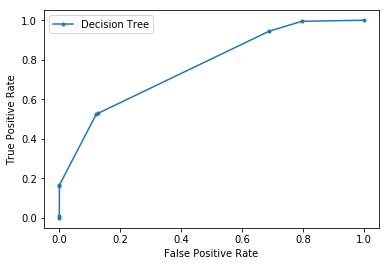

In [19]:
lr_auc = roc_auc_score(test, pred)
print('ROC AUC=%.3f' % (lr_auc))
lr_fpr, lr_tpr, _ = roc_curve(test, pred)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()